# rust jupyter

## install

```
$ cargo install --locked evcxr_jupyter
$ evcxr_jupyter --install

```
* readme
https://github.com/evcxr/evcxr/blob/main/evcxr_jupyter/README.md

* tour
https://github.com/evcxr/evcxr/blob/main/evcxr_jupyter/samples/evcxr_jupyter_tour.ipynb

In [2]:
let vec1 = vec![1,2,3,4,5];
println!("vec1: {:?}", vec1);


hello, vec1: [1, 2, 3, 4, 5]


In [3]:
:dep num
use num::complex::Complex;

let c1 = Complex::new(1.1, -1.2);
let c2 = Complex::new(22.2, 33.3);
println!("{:?} + {:?} = {:?}", c1, c2, c1+c2);

Complex { re: 1.1, im: -1.2 } + Complex { re: 22.2, im: 33.3 } = Complex { re: 23.3, im: 32.099999999999994 }


In [15]:
use std::fmt::Debug;

pub struct Matrix<T> {
    pub values: Vec<T>, 
    pub row_size: usize
}

impl<T: Debug> Matrix<T> {
    pub fn evcxr_display(&self) {
        let mut html = String::new();
        html.push_str("<table>");
        for r in 0..(self.values.len() / self.row_size) {
            html.push_str("<tr>");
            for c in 0..self.row_size {
                html.push_str("<td>");
                html.push_str(&format!("{:?}", self.values[r * self.row_size + c]));
                html.push_str("</td>");
            }
            html.push_str("</tr>");
        }
        html.push_str("</table>");
        println!("EVCXR_BEGIN_CONTENT text/html\n{}\nEVCXR_END_CONTENT", html);
    }
}
let m = Matrix {values: vec![1,2,3,4,5,6,7,8,9], row_size: 3};
m

1,2,3
4,5,6
7,8,9


In [16]:
:dep evcxr_input
let name = evcxr_input::get_string("Name?");
let password = evcxr_input::get_password("Password?");

## fibonaqi

In [17]:
pub fn fib(x: i32) -> i32 {
    if x <= 2 {1} else {fib(x - 2) + fib(x - 1)}
}

In [18]:
(1..13).map(fib).collect::<Vec<i32>>()

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

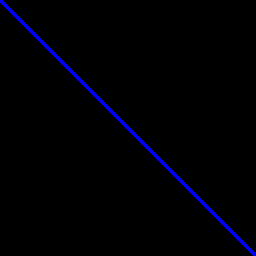

In [19]:
:dep image = "0.23"
:dep evcxr_image = "1.1"
use evcxr_image::ImageDisplay;

image::ImageBuffer::from_fn(256, 256, |x, y| {
    if (x as i32 - y as i32).abs() < 3 {
        image::Rgb([0, 0, 255])
    } else {
        image::Rgb([0, 0, 0])
    }
})